## KNN 알고리즘

* K-Nearest Neighbor 이고 회귀문제와 분류문제 모두 사용 가능

> KNN 모델은 k값이 아주 중요하다. k(탐색하는 이웃 개수)에 따라 데이터를 다르게 예측할 수 있기 때문이다.

> 기본값은 5이고, 검증 데이터로 가장 정확도가 높은 k를 찾아 KNN알고리즘의 K로 사용한다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

### 1. 회귀문제

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

In [4]:
#전처리 과정 (시계열 데이터는 선형보간법이 의미가 있으므로 선형보간법으로 채우자)
data.interpolate(method='linear', inplace=True)

data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [5]:
# 불필요한 변수 제거
drop_x = ['Month', 'Day']
data.drop(drop_x, axis=1, inplace=True)

# 확인
data.head(10)

,Ozone,Solar.R,Wind,Temp
0,41,190.000000,7.4,67
1,36,118.000000,8.0,72
2,12,149.000000,12.6,74
3,18,313.000000,11.5,62
4,19,308.333333,14.3,56
5,28,303.666667,14.9,66
6,23,299.000000,8.6,65
7,19,99.000000,13.8,59
8,8,19.000000,20.1,61
9,20,194.000000,8.6,69


In [6]:
# x,y 분리
target='Ozone'

x=data.drop(target, axis=1)
y=data.loc[:,target]

In [9]:
# 정규화 (중요)
x = (x - x.min()) / (x.max() - x.min())

#확인
x.head()

,Solar.R,Wind,Temp
0,0.559633,0.300000,0.268293
1,0.339450,0.331579,0.390244
2,0.434251,0.573684,0.439024
3,0.935780,0.515789,0.146341
4,0.921509,0.663158,0.000000


In [11]:
# 학습용, 평가용 데이터 분리하기
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

#### 모델링

In [18]:
#불러오기

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [27]:
#선언하기
model=KNeighborsRegressor(n_neighbors=5)

In [28]:
#학습하기
model.fit(x_train, y_train)

KNeighborsRegressor()

In [29]:
#예측하기
y_pred = model.predict(x_test)

In [30]:
#평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

#10정도의 오차가 발생하고 있고, 74% 정확도를 보인다

10.604347826086956
0.746582442756528


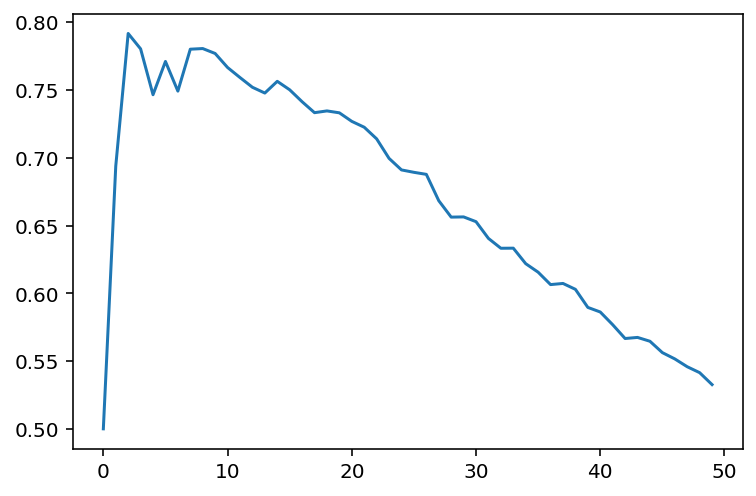

In [33]:
#시각화
result=[]
for i in range (1,51,1):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    result.append(r2_score(y_test,y_pred))

plt.plot(result)

# n 값이 10 이상부터 정확도가 떨어지고 있음

### 2.분류문제

In [34]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

In [35]:
# 호칭 추출 / Title 변수 추가
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# 대표 호칭 이외는 Others로 변경
main_tit_list = ['Mr', 'Miss', 'Mrs']
data.loc[data['Title'].isin(main_tit_list)==False, ['Title']] = 'Others'

# Age 결측치를 Title 별 중앙값으로 채우기
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace=True)

# Embarked 최빈값으로 채우기
data['Embarked'].fillna('S', inplace=True)

In [36]:
# 변수 추가
data['AgeGroup'] = pd.cut(data['Age'], 
                          bins=[0, 16, 25, 35, 60, 100], 
                          labels=['0_16', '17_25', '26_35', '36_60', '61_100'])

# 가변수화
dummy_vars = ['Title', 'AgeGroup', 'Pclass', 'Sex', 'Embarked']
data = pd.get_dummies(data, columns=dummy_vars, drop_first=True)

# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin']
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()

,Survived,SibSp,Parch,Fare,Title_Mr,Title_Mrs,Title_Others,AgeGroup_17_25,AgeGroup_26_35,AgeGroup_36_60,AgeGroup_61_100,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,7.2500,1,0,0,1,0,0,0,0,1,1,0,1
1,1,1,0,71.2833,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,7.9250,0,0,0,0,1,0,0,0,1,0,0,1
3,1,1,0,53.1000,0,1,0,0,1,0,0,0,0,0,0,1
4,0,0,0,8.0500,1,0,0,0,1,0,0,0,1,1,0,1


In [37]:
# x,y분리
target= 'Survived'

x=data.drop(target, axis=1)
y=data.loc[:,target]

In [38]:
#정규화 / 범주형 데이터는 정규화 하지 않아도 된다. 따로 컬럼 설정해서 해도 됨
x =( x-x.min()) / (x.max() - x.min())

x.head()

,SibSp,Parch,Fare,Title_Mr,Title_Mrs,Title_Others,AgeGroup_17_25,AgeGroup_26_35,AgeGroup_36_60,AgeGroup_61_100,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.125,0.0,0.014151,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.125,0.0,0.139136,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.0,0.015469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.125,0.0,0.103644,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000,0.0,0.015713,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [39]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

#### 모델링

In [41]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
# 선언하기
model=KNeighborsClassifier()

In [43]:
# 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [44]:
# 예측하기
y_pred = model.predict(x_test)

In [45]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[152  16]
 [ 34  66]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       168
           1       0.80      0.66      0.73       100

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



* 위 표 해석

정확도는 81%이고 1의 recall값은 많이 떨어진다.

In [49]:
# 가장 높은 정확도인 k 값 예측하기

from sklearn.metrics import accuracy_score

result = {}
my_k = 0
max_score = 0

for k in range(1,51,1):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    result[k]=accuracy_score(y_test, y_pred)
    if max_score < result[k] :
        max_score = result[k]
        my_k = k
        
print(my_k, max_score)

11 0.8208955223880597
